**HOME LOAN ELIGIBILITY PREDICTION**

Risk is always involved in the approval of the loans. Even after analyzing the loan application data numerous times, the loan approval decisions are not always correct. 
Dream Housing Finance company deals in home loans with presence across all urban, semi- urban and rural areas. 
The whole process of ascertaining if a burrower would pay back loans might be tedious hence the need to automate the procedure. 
Dream Housing Finance Company wants automation of this process so that the loan approval is less risky and does not incur loss to the company. 
We have to identify the factors that make a customer eligible for taking a home loan. The more accurate we are in predicting the eligible customers the more beneficial it would be for the Dream Housing Finance Company.

Data source: Kaggle
             https://www.kaggle.com/shaijudatascience/loan-prediction/data

The above problem is a classification problem,since we need to classify whether the Loan_Status is approved/Yes (Y) or rejected/No (N) using classification techniques like:
1.Logistic Regression 
2.Random Forest 
3.Decision Tree 

 **IMPORT THE REQUIRED LIBRARIES** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**READ THE DATA**

In [2]:
home_loan = pd.read_csv("../joshm/loan_train.csv")

**UNDERSTANDING THE DATA**

In [3]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**NUMBER OF COLUMNS AND ROWS IN THE DATA**

In [4]:
home_loan.shape

(614, 13)

There are 614 rows and 13 columns in our data set. Loan_Status is the target variable and all others are the decision variables that decide whether the loan will be approved or not.

**FEATURES/COLUMNS IN THE DATA**

In [5]:
home_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Brief description of the 13 features in our dataset:
1. Loan ID: Each applicant has a unique loan ID.
2. Gender:  Male or Female
3. Married:  Applicant who is married is represented by 'Yes' and not married is represented as 'No'. 
4. Dependents: Total number of persons dependent on the applicant.
5. Education: It is either 'Graduate' or 'Not Graduate'. 
6. Self_Employed: An applicant who is self employed is represented by 'Yes' and the one who is not is represented by 'No'.
7. Applicant_Income: Income of the applicant.
8. Coapplicant_Income: This represents the income of co-applicant.
9. LoanAmount: The total loan amount the applicant has applied for. This amount represents the loan amount in thousands.
10. Loan_Amount_Term: This represents the number of months required to repay the loan.
11. Credit_History: 1 denotes that the credit history is good and 0 otherwise.
12. Property_Area:  Three types mentioned: Urban or Semi Urban or Rural.
13. Loan_Status: If the applicant is eligible for loan it’s Yes represented by Y else it’s No represented by N.

**ABOUT THE DATA**

In [6]:
home_loan.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

**SUMMARY STATISTICS**

In [7]:
home_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The above table shows the summary statistics of our dataset such as mean, standard deviation(std), count, percentiles and more.

**DATA WRANGLING/CLEANING**

Formatting and cleaning the messy datasets and making it more suitable for easy access and data analysis. This includes:
1.Finding the data types of the features: Categorical/Numerical
2. Find missing values
3. Figure out Duplicate values
4. Replace the NaN numbers

**CHECK THE DATA TYPES OF THE VARIABLES**

In [8]:
home_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Our dataset has 3 data types:

1. object: Object datatype implies that the variables are categorical. Hence, there are 8 categorical variables in our dataset which are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status.

2. int64: this datatype represents the integer variables and there is only 1 integer variable in our dataset, 'Applicant_Income'.

3. float64: This datatype represents the numerical variable which have some decimal values involved. There are 4 such numerical variables in our dataset which are: Coapplicant_Income, LoanAmount, Loan_Amount_Term, and Credit_History.

Cleaning and formatting the messy datasets and making it more suitable for easy access and data anaylsis.

**TOTAL NUMBER OF MISSING VALUES IN THE DATA**

In [9]:
missing = home_loan.isnull().sum()

In [10]:
missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

**PERCENTAGE OF MISSING VALUES**

In [11]:
missing = pd.concat([home_loan.isnull().sum(), 100 * home_loan.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


The variable 'Credit_History' has the most number of missing values in our dataset.

**DUPLICATE VALUES IN THE DATASET**

In [12]:
home_loan.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [13]:
home_loan.duplicated().sum()

0

Our dataset has NO duplicate values.

**Transposing the dataset to get a clear view of all the features/columns**

In [14]:
home_loan.T

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,12000,2400,3400,3987,3232,2900,4106,8072,7583,4583
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0


**EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION**

**Histogram of the numerical features**

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

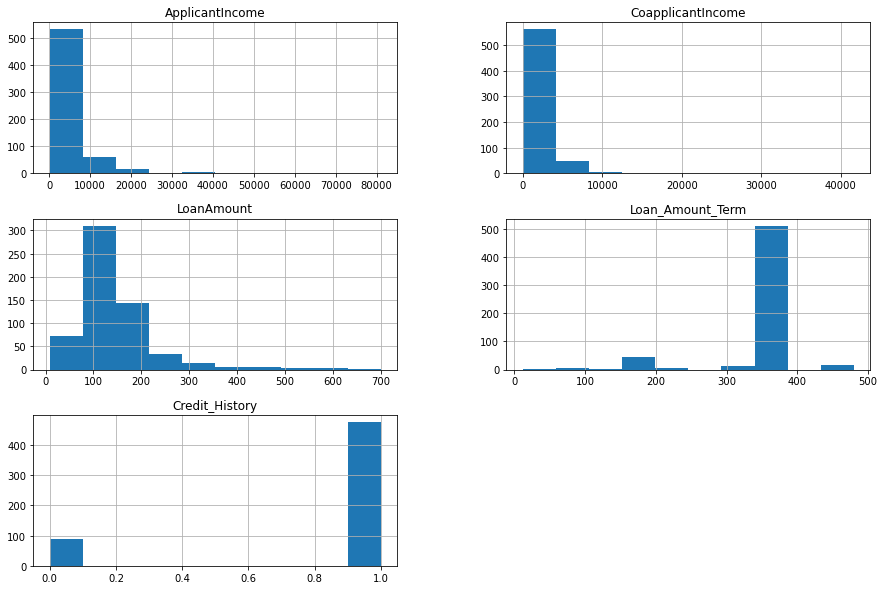

In [15]:
home_loan.hist(figsize=(15,10))

**1. UNIVARIATE ANALYSIS**

  **CREDIT HISTORY**

In [16]:
home_loan["Credit_History"].count()

564

In [17]:
home_loan["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In our dataset, 475 applicants have a good credit history whereas 89 of them do not.

**Normalize: Normalize can be set to True to print proportions instead of numbers.**

In [18]:
home_loan["Credit_History"].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

<AxesSubplot:title={'center':'Credit_History'}>

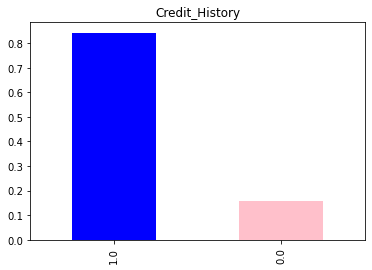

In [19]:
home_loan["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History", color= ['blue','pink'])

**TARGET VARIABLE: LOAN_STATUS**

In [20]:
home_loan["Loan_Status"].count()

614

In [21]:
home_loan["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Out of 614 applications, Approved(Y) : 422 Rejected(N) : 192

In [22]:
home_loan["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

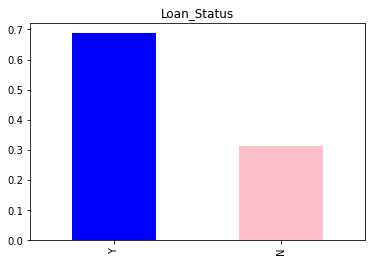

In [23]:
home_loan["Loan_Status"].value_counts(normalize=True).plot.bar(title = "Loan_Status", color= ['blue','pink'])

The loan of 422(around 69%) applicants was approved and 192(around 31%) was rejected.

In [24]:
home_loan["Gender"].count()

601

In [25]:
home_loan["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Our dataset has 489(around 81%) male applicants and 112(around 19%) female applicants.

In [26]:
home_loan["Gender"].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

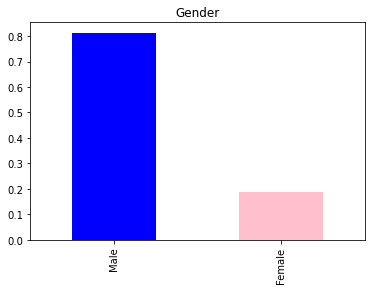

In [27]:
home_loan["Gender"].value_counts(normalize=True).plot.bar(title="Gender", color = ['blue', 'pink'])

Our dataset has 398(around 65%) married applicants and 213(around 35%) unmarried applicants.

In [28]:
home_loan["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
home_loan["Married"].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Married'}>

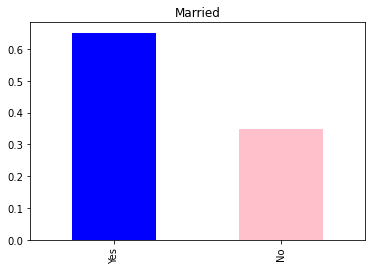

In [30]:
home_loan["Married"].value_counts(normalize=True).plot.bar(title="Married", color = ['blue', 'pink'])

In [31]:
home_loan["Dependents"].count()

599

In [32]:
home_loan["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
home_loan["Dependents"].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

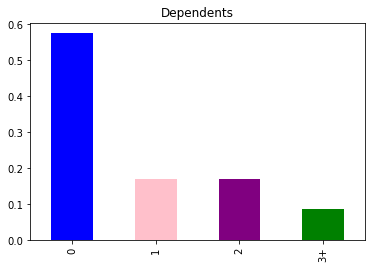

In [34]:
home_loan["Dependents"].value_counts(normalize=True).plot.bar(title='Dependents', color=['blue','pink','purple','green'])

57% of our applicants have no dependents, 17% have only 1 dependent, 16% have 2 dependents and 8% have more than 3 dependents.

In [35]:
home_loan["Education"].count()

614

In [36]:
home_loan["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
home_loan["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

<AxesSubplot:title={'center':'Education'}>

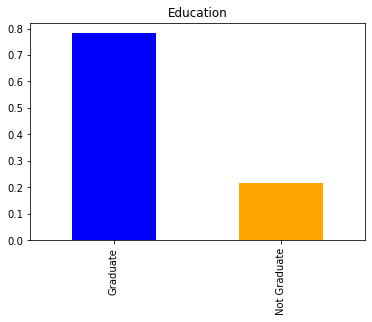

In [38]:
home_loan["Education"].value_counts(normalize=True).plot.bar(title="Education", color = ['blue', 'orange'])

Here we observed that majority(around 78%) of our applicants are 'Graduates' and only around 22% are 'Not Graduates'.

In [39]:
home_loan["Property_Area"].count()

614

In [40]:
home_loan["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [41]:
home_loan["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:title={'center':'Property_Area'}>

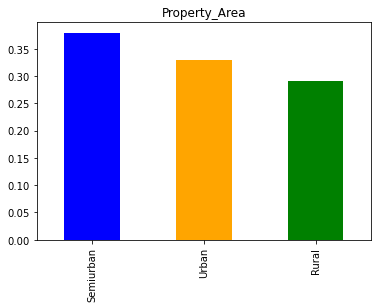

In [42]:
home_loan["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area", color = ['blue', 'orange','green'])

Out of total 614 properties, around 38%(233) are Semiurban, 33%(202) are urban and around 29%(179) are Rural.

In [43]:
home_loan["Self_Employed"].count()

582

In [44]:
home_loan["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
home_loan["Self_Employed"].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

<AxesSubplot:title={'center':'Self_Employed'}>

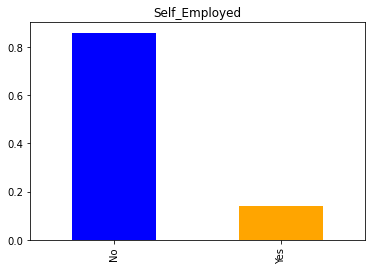

In [46]:
home_loan["Self_Employed"].value_counts(normalize=True).plot.bar(title = "Self_Employed", color= ['blue', 'orange'])

Out of 582, only 82 (14%) are Self-Employed and the rest 500(86%) are Not Self-Employed.

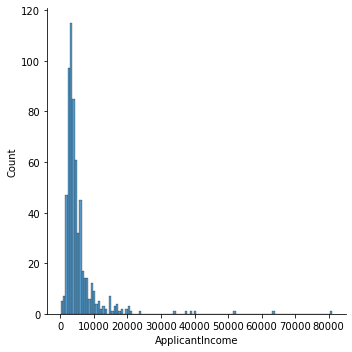

In [47]:
sns.displot(home_loan.ApplicantIncome)

**CHECKING OUTLIERS**

<AxesSubplot:>

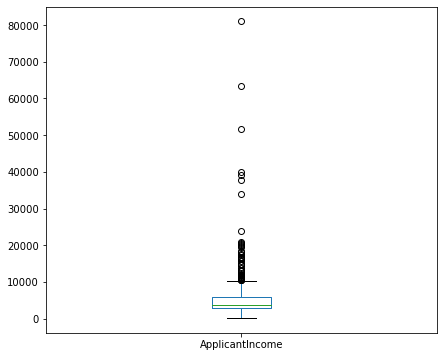

In [48]:
home_loan["ApplicantIncome"].plot.box(figsize=(7,6))

The boxplot shows presence of outliers in the 'ApplicantIncome' variable. This can be attributed to the income disparity in the society.

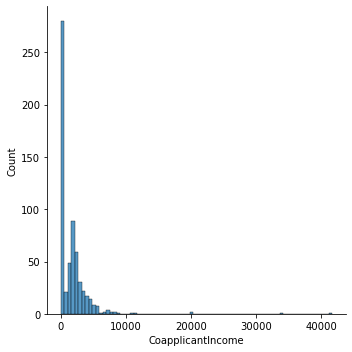

In [49]:
sns.displot(home_loan.CoapplicantIncome)

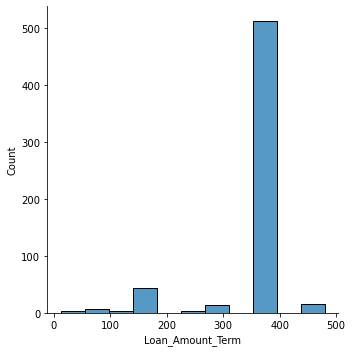

In [50]:
sns.displot(home_loan.Loan_Amount_Term)

<AxesSubplot:>

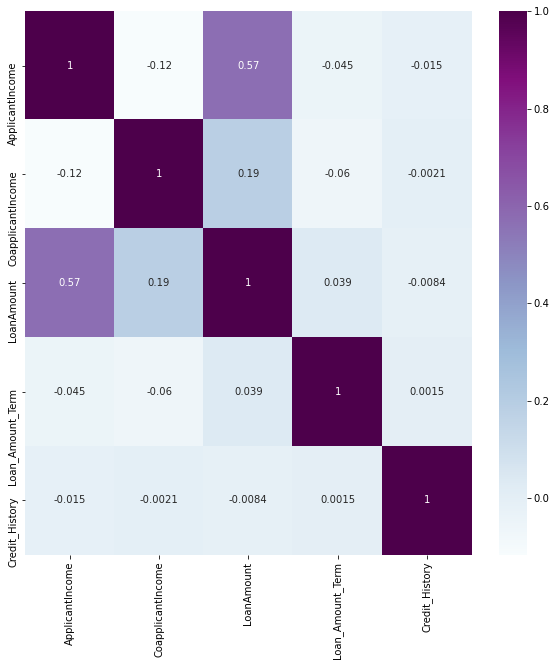

In [51]:
corr = home_loan.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap= "BuPu")

In [52]:
home_loan['CoapplicantIncome']=home_loan['CoapplicantIncome'].astype(int)

In [53]:
home_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**BIVARIATE ANALYSIS**

Relationship analysis between the target feature/variable (Loan_Status) and the rest of the predictor variables/features.

**Relation between "Loan_Status" and "Gender"**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


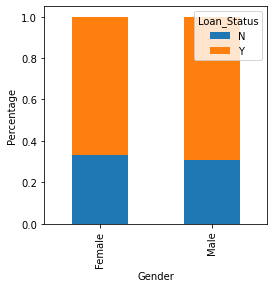

In [54]:
print(pd.crosstab(home_loan["Gender"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Gender"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

<AxesSubplot:xlabel='count', ylabel='Gender'>

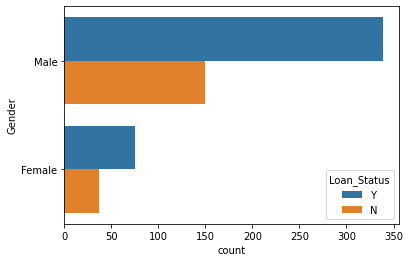

In [55]:
sns.countplot(y='Gender', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Married"**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


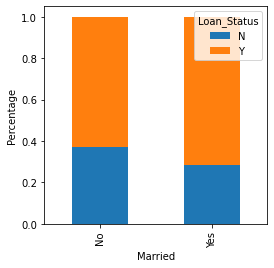

In [56]:
print(pd.crosstab(home_loan["Married"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Married"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Result:
Number of married people whose Loan was approved : 285

Number of married people whose Loan was not approved : 113

Number of unmarried people whose Loan was approved : 134

Number of unmarried people whose Loan was not approved : 79

Hence, Proportion of Married applicants is higher for the approved loans.

<AxesSubplot:xlabel='count', ylabel='Married'>

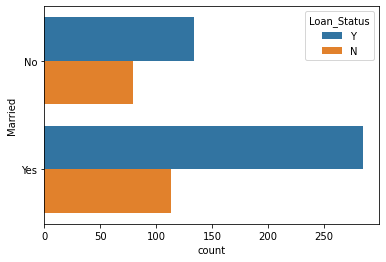

In [57]:
sns.countplot(y='Married', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Dependents"**

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


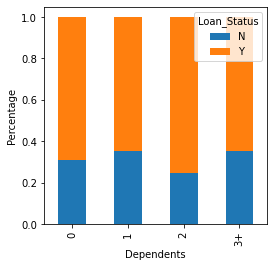

In [58]:
print(pd.crosstab(home_loan["Dependents"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Dependents"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Result:
Loan applicants with 0 dependent whose Loan was Approved : 238
Loan applicants with 0 dependent whose Loan was NOT approved: 107

Loan applicants with 1 dependent whose Loan was approved: 66
Loan applicants with 1 dependents whose Loan was NOT approved: 36

Loan applicants with 2 dependents whose Loan was approved: 76
Loan applicants with 2 dependents whose Loan was NOT approved:25

Loan applicants with 3+ dependents whose Loan was approved:33
Loan applicants with 3+ dependents whose Loan was NOT approved:18

<AxesSubplot:xlabel='count', ylabel='Dependents'>

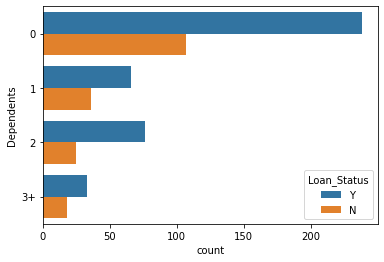

In [59]:
sns.countplot(y='Dependents', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Education"**

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


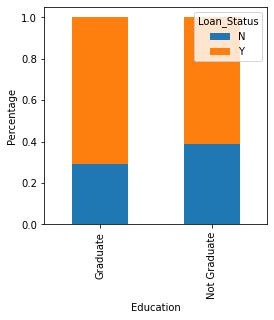

In [60]:
print(pd.crosstab(home_loan["Education"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Education"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Result:
Graduate applicants whose Loan was approved : 340

Graduate applicants whose Loan was NOT approved : 140

Not Graduate applicants whose Loan was approved : 82

Not Graduate applicants whose Loan was not approved : 52

Hence, Proportion of Graduate applicants is higher for the approved loans.

<AxesSubplot:xlabel='count', ylabel='Education'>

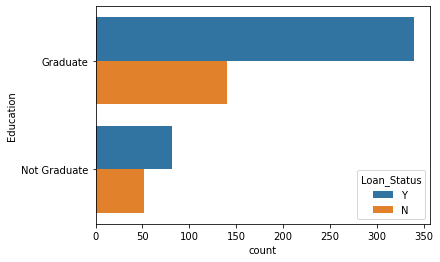

In [61]:
sns.countplot(y='Education', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Self_Employed"**

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


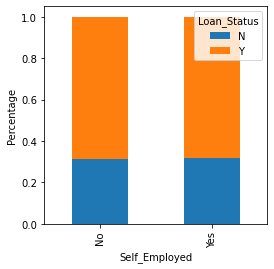

In [62]:
print(pd.crosstab(home_loan["Self_Employed"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Self_Employed"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Result:
Self_Employed applicants whose Loan was approved : 56

Self_Employed applicants whose Loan was NOT approved : 26

Applicants who are not Self_Employed with Loan approved : 343

Applicants who are not Self_Employed whose Loan was not approved : 157

Nothing significant was concluded from the Self_Employed vs Loan_Status plot.

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

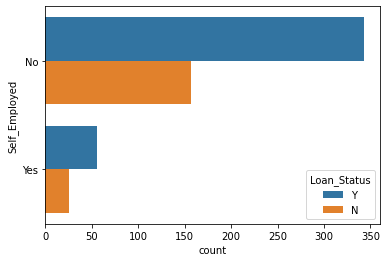

In [63]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Credit_History"**

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


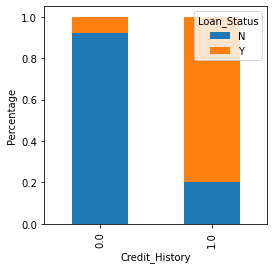

In [64]:
print(pd.crosstab(home_loan["Credit_History"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Credit_History"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Result:
Applicants with good credit history of 1 whose loan was approved : 378

Applicants with good credit history of 1 whose loan was not approved : 97

Applicants with credit history of 0 whose loan was approved : 7

Applicants with credit history of 0 whose loan was not approved : 82

It implies applicants with good credit history of 1 are more likely to get their loans approved.

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

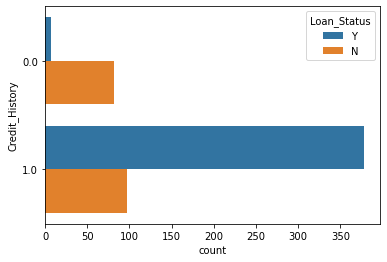

In [65]:
sns.countplot(y='Credit_History', hue='Loan_Status', data= home_loan)

**Relation between "Loan_Status" and "Property_Area"**

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


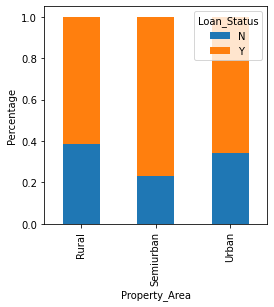

In [66]:
print(pd.crosstab(home_loan["Property_Area"],home_loan["Loan_Status"]))
Gender = pd.crosstab(home_loan["Property_Area"],home_loan["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Percentage")
plt.show()

Result:
Loan approved for rural area property : 110

Loan not approved for rural area property  : 69

Loan approved for semi urban area property : 179

Loan not approved for semi urban area property : 54

Loan approved for urban area property: 133

Loan not approved for urban area property : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

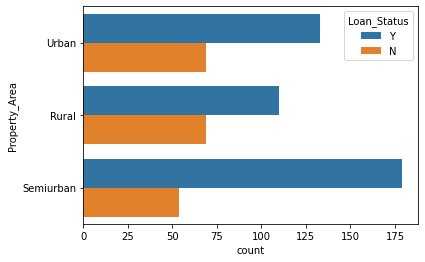

In [67]:
sns.countplot(y='Property_Area', hue='Loan_Status', data= home_loan)

In [68]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


**Relation between "Loan_Status" and "Loan_Amount_Term"**

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

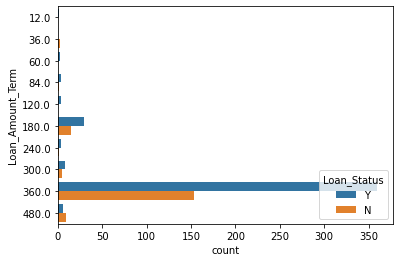

In [69]:
sns.countplot(y='Loan_Amount_Term', hue='Loan_Status', data= home_loan)

Result: 
Most of the loans are approved for term of 360 months(3 years).

**Relation between "Loan_Status" and "LoanAmount"**

In [70]:
bins = [0,100,200,700]
group=['Low','Average','High']
home_loan["LoanAmount_bin"]=pd.cut(home_loan["LoanAmount"],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


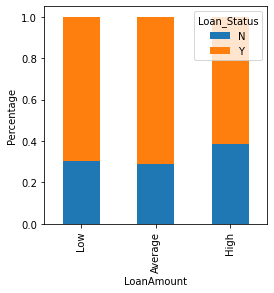

In [71]:
print(pd.crosstab(home_loan["LoanAmount_bin"],home_loan["Loan_Status"]))
LoanAmount=pd.crosstab(home_loan["LoanAmount_bin"],home_loan["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Result: 
Whose Loan Amount was low and Loan was approved : 107

Whose Loan Amount was low and Loan was not approved : 47

Whose Loan Amount was Average and Loan was approved : 255

Whose Loan Amount was Average and Loan was not approved : 103

Whose Loan Amount was High and Loan was approved : 49

Whose Loan Amount was High and Loan was not approved : 31

It shows that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which implies the chances of loan approval will be high when the loan amount is less.

**Relation between "Loan_Status" and "ApplicantIncome"**

Find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

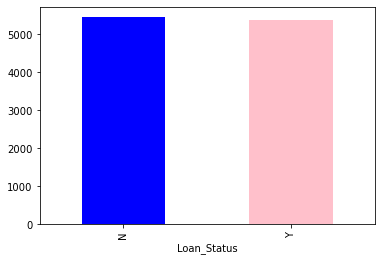

In [72]:
home_loan.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar(color= ['blue', 'pink'])

Here the y-axis represents the mean applicant income. There is not any change in the mean income. So, we have make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [73]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
home_loan['Income_bins']=pd.cut(home_loan['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bins         
Low          34   74
Average      67  159
High         45   98
Very High    46   91


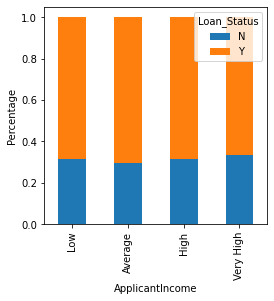

In [74]:
print(pd.crosstab(home_loan["Income_bins"],home_loan["Loan_Status"]))
Income_bins = pd.crosstab(home_loan["Income_bins"],home_loan["Loan_Status"])
Income_bins.div(Income_bins.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that Applicant income does not affect the chances of loan approval which does not seem correct as usually if the applicant income is high the chances of loan approval is high because he is eligible to repay the loan. Hence, we have to look into some other features related to Applicant Income.

In [75]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_bin,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y,NaN,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N,Average,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y,Low,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y,Average,High


**Relation between "Loan_Status" and "CoapplicantIncome"**

In [76]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
home_loan['CoapplicantIncome_bin']=pd.cut(home_loan["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   19
Average                61  161
High                   32   65


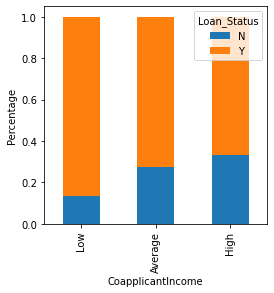

In [77]:
print(pd.crosstab(home_loan["CoapplicantIncome_bin"],home_loan["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(home_loan["CoapplicantIncome_bin"],home_loan["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less then the chances of loan approval are high. But this also does not look right. The possible reason for this result may be because most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we have to make a new variable (Total Income) in the Feature Engineering section by combining the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

**IMPUTING THE MISSING VALUES**

Methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [78]:
home_loan['LoanAmount']=home_loan['LoanAmount'].fillna(home_loan['LoanAmount'].mean())

In [79]:
home_loan['Loan_Amount_Term']=home_loan['Loan_Amount_Term'].fillna(home_loan['Loan_Amount_Term'].mode()[0])

In [80]:
home_loan['Credit_History']=home_loan['Credit_History'].fillna(home_loan['Credit_History'].mode()[0])

In [81]:
home_loan['Gender']=home_loan['Gender'].fillna(home_loan['Gender'].mode()[0])

In [82]:
home_loan['Married']=home_loan['Married'].fillna(home_loan['Married'].mode()[0])

In [83]:
home_loan['Dependents']=home_loan['Dependents'].fillna(home_loan['Dependents'].mode()[0])

In [84]:
home_loan['Self_Employed']=home_loan['Self_Employed'].fillna(home_loan['Self_Employed'].mode()[0])

In [85]:
missing = home_loan.isnull().sum()

In [86]:
missing

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
LoanAmount_bin            22
Income_bins                0
CoapplicantIncome_bin    273
dtype: int64

**FEATURE ENGINEERING**

1. **TOTAL INCOME**

In [87]:
home_loan['TotalIncome']= home_loan['ApplicantIncome']+ home_loan['CoapplicantIncome']

In [88]:
home_loan["TotalIncome"].head()

0    5849
1    6091
2    3000
3    4941
4    6000
Name: TotalIncome, dtype: int64

**Relation between "Loan_Status" and "TotalIncome"**

In [89]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
home_loan["TotalIncome_bin"]=pd.cut(home_loan["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


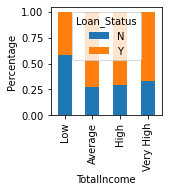

In [90]:
print(pd.crosstab(home_loan["TotalIncome_bin"],home_loan["Loan_Status"]))
TotalIncome = pd.crosstab(home_loan["TotalIncome_bin"],home_loan["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Results:

TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was apprvoed : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

It shows that the proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [91]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_bin,Income_bins,CoapplicantIncome_bin,TotalIncome,TotalIncome_bin
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y,NaN,High,NaN,5849,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,Average,High,Average,6091,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,Low,Average,NaN,3000,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,Average,Average,Average,4941,High
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,Average,High,NaN,6000,High


**Drop the bins created for the Exploratory Data Analysis**

In [92]:
home_loan=home_loan.drop(["Income_bins","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome_bin"],axis=1)

In [93]:
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y,5849
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,6000


**Distribution of Total Income**

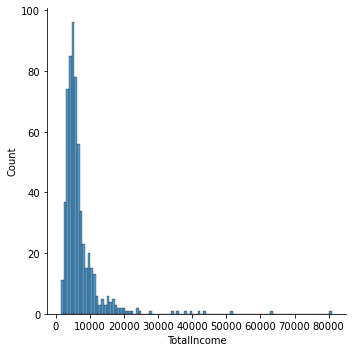

In [94]:
sns.displot(home_loan["TotalIncome"])

The plot shows skewness: its a right-skewed distribution and we have to do a log transformation to get a normally distributed data.

**Log Transformation**

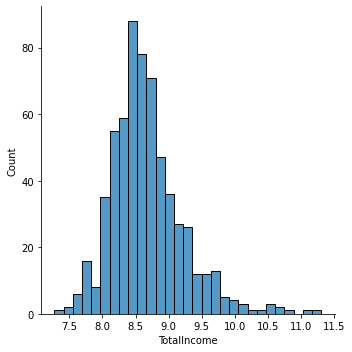

In [95]:
home_loan["TotalIncome"]=np.log(home_loan["TotalIncome"])
sns.displot(home_loan["TotalIncome"])

The plot above now is normally distributed.

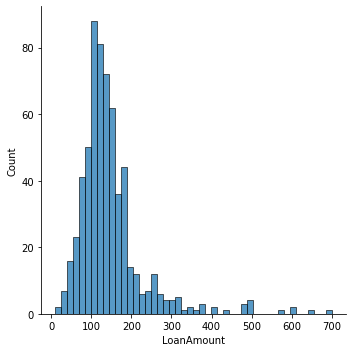

In [96]:
sns.displot(home_loan["LoanAmount"])

<AxesSubplot:>

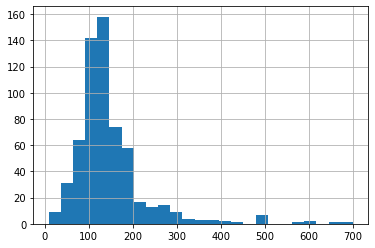

In [97]:
home_loan['LoanAmount'].hist(bins=25)

we can see some outliers due to which majority of the data in the loan amount is at the left and the right tail is longer. This is called right-skewed distribution.

we can remove this skewness by log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

Hence, we get a normal distribution.

**Log Transformation**

In [98]:
home_loan['LoanAmount']= np.log(home_loan['LoanAmount'])

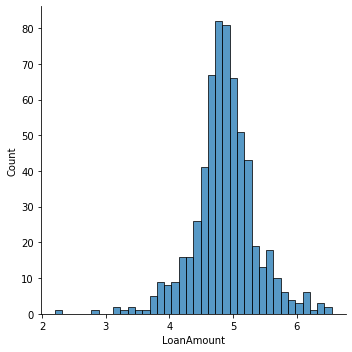

In [99]:
sns.displot(home_loan.LoanAmount)

**2. EMI**

In [100]:
home_loan["EMI"]= home_loan["LoanAmount"]/home_loan["Loan_Amount_Term"]

In [101]:
home_loan["EMI"].head()

0    0.013851
1    0.013478
2    0.011638
3    0.013299
4    0.013747
Name: EMI, dtype: float64

**Distribution of EMI**

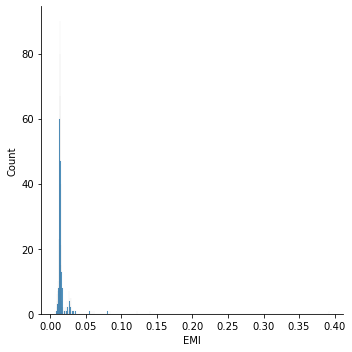

In [102]:
sns.displot(home_loan["EMI"])

**3. EMI*1000**

In [103]:
home_loan["EMI"]=home_loan["EMI"]*1000

In [104]:
home_loan["EMI"].head()

0    13.851182
1    13.477862
2    11.637930
3    13.298588
4    13.746555
Name: EMI, dtype: float64

**4. LABEL ENCODING**

Label Encoding replaces the categorical value with a numeric value between 0 and the number of classes minus 1, making them lot easier to quantify and compare.

In [105]:
columns=['Loan_Status','Gender', 'Married', 'Education','Self_Employed','Property_Area','Dependents']
le = LabelEncoder()
for column in columns:
    home_loan[column]= le.fit_transform(home_loan[column])

In [106]:
home_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI
0,LP001002,1,0,0,0,0,5849,0,4.986426,360.0,1.0,2,1,8.674026,13.851182
1,LP001003,1,1,1,0,0,4583,1508,4.852030,360.0,1.0,0,0,8.714568,13.477862
2,LP001005,1,1,0,0,1,3000,0,4.189655,360.0,1.0,2,1,8.006368,11.637930
3,LP001006,1,1,0,1,0,2583,2358,4.787492,360.0,1.0,2,1,8.505323,13.298588
4,LP001008,1,0,0,0,0,6000,0,4.948760,360.0,1.0,2,1,8.699515,13.746555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0,4.262680,360.0,1.0,0,1,7.972466,11.840777
610,LP002979,1,1,3,0,0,4106,0,3.688879,180.0,1.0,0,1,8.320205,20.493775
611,LP002983,1,1,1,0,0,8072,240,5.533389,360.0,1.0,2,1,9.025456,15.370526
612,LP002984,1,1,2,0,0,7583,0,5.231109,360.0,1.0,2,1,8.933664,14.530857


In [107]:
home_loan.Loan_Amount_Term.value_counts(dropna=False)

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:>

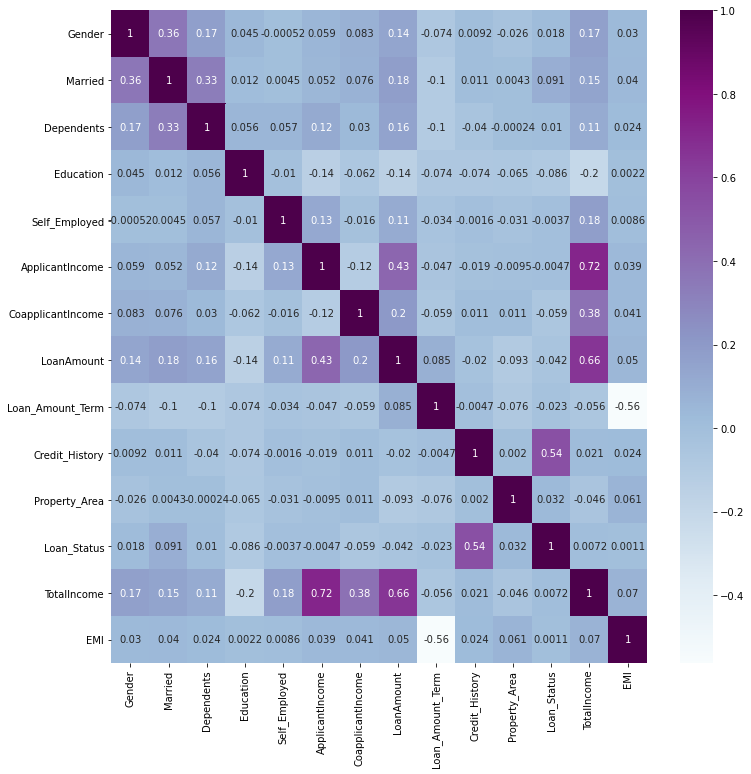

In [108]:
corr = home_loan.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True, cmap= "BuPu")

In [109]:
home_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.144378,-0.074030,0.009170,-0.025752,0.017987,0.167285,0.030316
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075947,0.180178,-0.100912,0.010938,0.004257,0.091478,0.151526,0.039616
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030429,0.156391,-0.103864,-0.040160,-0.000244,0.010118,0.112811,0.023612
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.143367,-0.073928,-0.073658,-0.065243,-0.085884,-0.204860,0.002216
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.109629,-0.033739,-0.001550,-0.030860,-0.003700,0.176709,0.008613
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116604,0.434849,-0.046531,-0.018615,-0.009500,-0.004710,0.717829,0.038831
CoapplicantIncome,0.082912,0.075947,0.030429,-0.062290,-0.016100,-0.116604,1.000000,0.204179,-0.059382,0.011134,0.010521,-0.059188,0.383827,0.041003
LoanAmount,0.144378,0.180178,0.156391,-0.143367,0.109629,0.434849,0.204179,1.000000,0.084616,-0.019542,-0.092798,-0.041874,0.657508,0.049935
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059382,0.084616,1.000000,-0.004705,-0.076120,-0.022549,-0.056042,-0.562348
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.019542,-0.004705,1.000000,0.001963,0.540556,0.020790,0.024442


In [110]:
home_loan['Loan_Status'].corr(home_loan['Gender'])

0.01798667870703216

In [111]:
home_loan['Loan_Status'].corr(home_loan['Married'])

0.09147782473606036

In [112]:
home_loan['Loan_Status'].corr(home_loan['Dependents'])

0.010118454497004551

In [113]:
home_loan['Loan_Status'].corr(home_loan['Education'])

-0.0858839146753654

In [114]:
home_loan['Loan_Status'].corr(home_loan['Self_Employed'])

-0.0037004377149821312

In [115]:
home_loan['Loan_Status'].corr(home_loan['ApplicantIncome'])

-0.004709522659351541

In [116]:
home_loan['Loan_Status'].corr(home_loan['CoapplicantIncome'])

-0.05918765124189558

In [117]:
home_loan['Loan_Status'].corr(home_loan['TotalIncome'])

0.007239517007191832

In [118]:
home_loan['Loan_Status'].corr(home_loan['Property_Area'])

0.03211198462880024

In [119]:
home_loan['Loan_Status'].corr(home_loan['Credit_History'])

0.5405560719222504

In [120]:
home_loan['Loan_Status'].corr(home_loan['LoanAmount'])

-0.04187358290777825

In [121]:
home_loan['Loan_Status'].corr(home_loan['Loan_Amount_Term'])

-0.022548993503422644

**5. BALANCE INCOME**

In [122]:
home_loan["Balance_Income"] = home_loan["TotalIncome"]-home_loan["EMI"]

In [123]:
home_loan["Balance_Income"].head()

0   -5.177156
1   -4.763294
2   -3.631562
3   -4.793265
4   -5.047041
Name: Balance_Income, dtype: float64

**Drop the correlated features to remove the noise from the dataset**

In [124]:
home_loan.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

**6. DEBT TO INCOME RATIO(DTI)**

In [125]:
home_loan["DTI"]= (home_loan["EMI"]/home_loan["TotalIncome"])*100

In [126]:
home_loan["DTI"]

0      159.685738
1      154.658986
2      145.358426
3      156.356062
4      158.015196
          ...    
609    148.520889
610    246.313351
611    170.301945
612    162.652826
613    161.140301
Name: DTI, Length: 614, dtype: float64

In [127]:
home_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,Balance_Income,DTI
0,1,0,0,0,0,4.986426,360.0,1.0,2,1,8.674026,13.851182,-5.177156,159.685738
1,1,1,1,0,0,4.852030,360.0,1.0,0,0,8.714568,13.477862,-4.763294,154.658986
2,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368,11.637930,-3.631562,145.358426
3,1,1,0,1,0,4.787492,360.0,1.0,2,1,8.505323,13.298588,-4.793265,156.356062
4,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515,13.746555,-5.047041,158.015196


**MODELING**

After creating new features, we can continue the model building process. We will start with logistic regression model and then move over to RandomForest and Decision Tree model.

**TRAIN-TEST SPLIT**

We will split our dataset into training and test set in the ratio of 70:30 respectively.Then we will train the model on the training dataset and make predictions for the test dataset.

**IMPORT the required libraries**

In [128]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

**Separating the data and labels**

In [129]:
X = home_loan.drop(columns = 'Loan_Status', axis=1)
y = home_loan['Loan_Status']

In [130]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,EMI,Balance_Income,DTI
0,1,0,0,0,0,4.986426,360.0,1.0,2,8.674026,13.851182,-5.177156,159.685738
1,1,1,1,0,0,4.852030,360.0,1.0,0,8.714568,13.477862,-4.763294,154.658986
2,1,1,0,0,1,4.189655,360.0,1.0,2,8.006368,11.637930,-3.631562,145.358426
3,1,1,0,1,0,4.787492,360.0,1.0,2,8.505323,13.298588,-4.793265,156.356062
4,1,0,0,0,0,4.948760,360.0,1.0,2,8.699515,13.746555,-5.047041,158.015196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,360.0,1.0,0,7.972466,11.840777,-3.868311,148.520889
610,1,1,3,0,0,3.688879,180.0,1.0,0,8.320205,20.493775,-12.173570,246.313351
611,1,1,1,0,0,5.533389,360.0,1.0,2,9.025456,15.370526,-6.345071,170.301945
612,1,1,2,0,0,5.231109,360.0,1.0,2,8.933664,14.530857,-5.597193,162.652826


In [131]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=1)

In [133]:
len(X_train)

429

In [134]:
len(X_test)

185

**FIT THE MODEL**

**1. LOGISTIC REGRESSION**

In [135]:
logistic_model = LogisticRegression()

In [136]:
X, y = make_classification()

In [137]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())

In [138]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [139]:
pipe.score(X_test, y_test)

0.7891891891891892

It shows our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly from our logistic regression model.

In [140]:
pipe.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color='orange',label='ROC')
    plt.plot([0,1],[0,1], color='blue',linestyle ='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [143]:
probs=pipe.predict_proba(X_test)

In [144]:
probs

array([[0.21241591, 0.78758409],
       [0.22743173, 0.77256827],
       [0.22020863, 0.77979137],
       [0.21681227, 0.78318773],
       [0.16670243, 0.83329757],
       [0.93542359, 0.06457641],
       [0.12551322, 0.87448678],
       [0.29656435, 0.70343565],
       [0.32364263, 0.67635737],
       [0.92037015, 0.07962985],
       [0.16793302, 0.83206698],
       [0.16667185, 0.83332815],
       [0.24146486, 0.75853514],
       [0.27574286, 0.72425714],
       [0.23233368, 0.76766632],
       [0.26214065, 0.73785935],
       [0.14060689, 0.85939311],
       [0.22108733, 0.77891267],
       [0.15025173, 0.84974827],
       [0.22133578, 0.77866422],
       [0.24850122, 0.75149878],
       [0.16961778, 0.83038222],
       [0.24320871, 0.75679129],
       [0.13095141, 0.86904859],
       [0.17783374, 0.82216626],
       [0.34401986, 0.65598014],
       [0.36948758, 0.63051242],
       [0.91796172, 0.08203828],
       [0.17685941, 0.82314059],
       [0.25843436, 0.74156564],
       [0.

In [145]:
probs = probs[:, 1]

In [146]:
from sklearn.metrics import roc_auc_score

In [147]:
auc = roc_auc_score(y_test, probs)

In [148]:
print ('AUC: %.2f' % auc)

AUC: 0.72


In [149]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

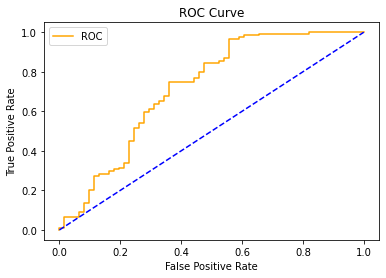

In [150]:
plot_roc_curve(fpr,tpr)

In [151]:
probs

array([0.78758409, 0.77256827, 0.77979137, 0.78318773, 0.83329757,
       0.06457641, 0.87448678, 0.70343565, 0.67635737, 0.07962985,
       0.83206698, 0.83332815, 0.75853514, 0.72425714, 0.76766632,
       0.73785935, 0.85939311, 0.77891267, 0.84974827, 0.77866422,
       0.75149878, 0.83038222, 0.75679129, 0.86904859, 0.82216626,
       0.65598014, 0.63051242, 0.08203828, 0.82314059, 0.74156564,
       0.70518783, 0.73998935, 0.79589787, 0.12788952, 0.80509231,
       0.85494554, 0.72438692, 0.74855638, 0.87991049, 0.8014432 ,
       0.80074971, 0.88531349, 0.78967741, 0.82707491, 0.80984824,
       0.74407655, 0.86781779, 0.08229001, 0.82713171, 0.81143136,
       0.79390732, 0.73519821, 0.80831095, 0.82704377, 0.79496481,
       0.11297572, 0.79798426, 0.03642768, 0.86185993, 0.82602457,
       0.78949943, 0.86349337, 0.81002729, 0.08358607, 0.0630605 ,
       0.8072898 , 0.80511587, 0.81319473, 0.7354893 , 0.84676941,
       0.80103465, 0.87633846, 0.8801572 , 0.06227392, 0.78985

**HYPERPARAMETER TUNING USING GridSearchCV**

Hyperparameter Tuning or optimization is choosing a set of optimal hyperparameters for a learning algorithm.

In [152]:
param_grid = [
    {'penalty': ['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4, 4, 20),
     'solver' : ['lbfgs','newton-cg','liblinear','sag', 'saga'],
     'class_weight' : ['balanced','none'],
     'max_iter': [100, 1000, 2500, 5000]
    }
]

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
clf = GridSearchCV(logistic_model, param_grid = param_grid, cv=5, verbose = True, n_jobs=-1)

In [155]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


C:\Users\joshm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.30536252 ...        nan 0.69228454 0.69228454]
  warnings.warn(
C:\Users\joshm\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [156]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight='balanced', penalty='l1',
                   solver='liblinear')

**ACCURACY**

In [157]:
print(f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.795


In [158]:
pipe.named_steps['logisticregression'].coef_

array([[-0.08320265,  0.14560519,  0.17657151, -0.15922271, -0.06417995,
        -0.10628938, -0.13155506,  1.3404641 ,  0.04121842,  0.09326795,
         0.08357154, -0.08102364, -0.2294412 ]])

We find that 'Credit_History', 'BalanceIncome','Total Income', 'DTI' 'EMI', 'Education'  features are most important in predicting the target variable (Loan_Status).
Since in Label encoding the Education column, the 'Graduate' label is coded as 0 and 'Not Graduate' label coded as 1, hence it is showing a negative correlation to the Education feature. In our dataset, applicants who are Graduates  have a higher Loan approval rate as compared to the 'Not Graduates'.
In the column 'Balance Income', all the values are negative, hence Balance Income and DTI (Debt to Income)feature shows a negative correlation.

**2. RANDOM FOREST MODEL**

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
X, y = make_classification(n_samples=614, n_features=14,random_state=3)

In [161]:
rf_model = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)

In [162]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=1)

In [163]:
rf_model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1])

In [164]:
rf_model.score(X_test, y_test)

0.7675675675675676

The predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly from the Random Forest model.

In [165]:
y_proba = rf_model.predict_proba(X_test)[:,1]

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

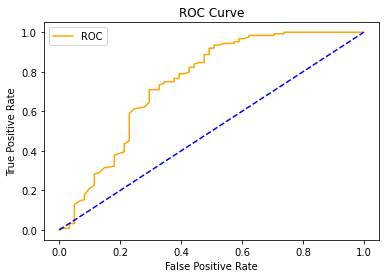

In [167]:
plot_roc_curve(fpr,tpr)

**HYPERPARAMETER TUNING**

*PARAMETERS**
**For increasing the predictive power:**
*n_estimators* : number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions.
*max_features* : maximum number of features random forest considers to split a node.
*random_state* : hyperparameter makes the model’s output replicable
*min_samples_leaf*:The minimum number of samples required to be at a leaf node

In [168]:
rf_model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=rf_model.predict(X_test)

print(accuracy_score(y_test,predictions))

0.7891891891891892


In [169]:
print(f'Accuracy - : {rf_model.score(X_test,y_test):.3f}')

Accuracy - : 0.789


In [170]:
from sklearn import metrics

In [171]:
y_pred = rf_model.predict(X_test)

In [172]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))

area under curve (auc):  0.6886567953463776


**3. DECISION TREE MODEL**

In [173]:
from sklearn.tree import DecisionTreeClassifier
# Creating the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [174]:
y_pred = dtree.predict(X_test)

In [175]:
dtree.score(X_test, y_test)

0.6972972972972973

In this model, our  predictions are almost 71% accurate, i.e. we have identified 71% of the loan status correctly from the Decision tree model.

In [176]:
y_proba = dtree.predict_proba(X_test)[:,1]

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

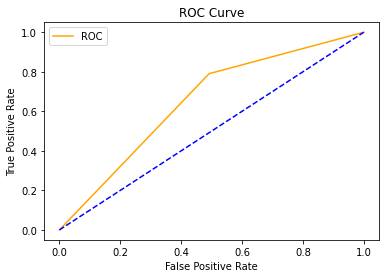

In [178]:
plot_roc_curve(fpr,tpr)

**HYPERPARAMETER TUNING**

In [179]:
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [180]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.6773728813559322
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [181]:
print(f'Accuracy - : {dtree.score(X_test,y_test):.3f}')

Accuracy - : 0.697


**ROC-AUC score: Model comparison**

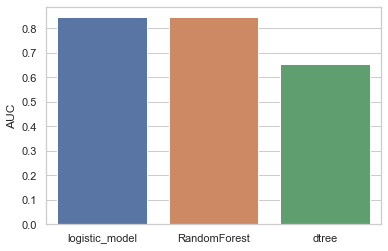

In [182]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["logistic_model","RandomForest", "dtree"],
            y=[roc_auc_score(pipe.predict(X_test), y_test), roc_auc_score(rf_model.predict(X_test), y_test), roc_auc_score(dtree.predict(X_test), y_test)])
               
plt.ylabel("AUC") 
plt.show()

**Drop the correlated variables,EMI and Balance_Income**

In [183]:
home_loan.drop(['EMI','Balance_Income'], axis=1, inplace=True)

<AxesSubplot:>

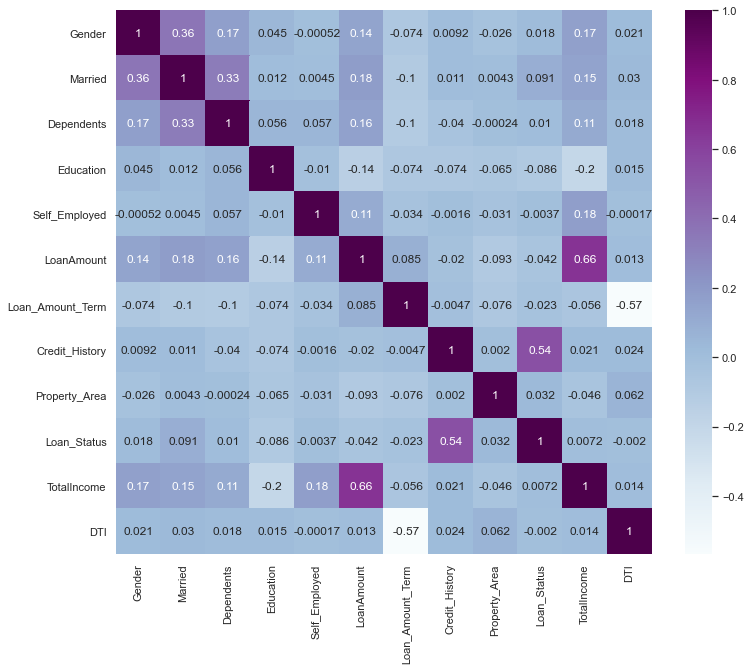

In [186]:
corr = home_loan.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, cmap= "BuPu")